0%  0.0 s
1%  52.18662214279175 s
2%  103.6772711277008 s
3%  154.6598997116089 s
4%  206.2335205078125 s
5%  257.5085151195526 s
6%  310.2794077396393 s
7%  361.5735704898834 s
8%  412.66250801086426 s
9%  464.0896863937378 s
10%  512.8142507076263 s
11%  559.9550311565399 s
12%  608.1968343257904 s
13%  656.3575713634491 s
14%  707.9268002510071 s
15%  770.086629152298 s
16%  835.0476655960083 s
17%  897.5175461769104 s
18%  950.786627292633 s
19%  1009.2806692123413 s
20%  1072.4293241500854 s
21%  1135.1579902172089 s
22%  1190.8566517829895 s
23%  1250.6914224624634 s
24%  1304.3609421253204 s
25%  1353.6399579048157 s
26%  1407.3113708496094 s
27%  1458.1804158687592 s
28%  1509.929434299469 s
29%  1564.855218887329 s
30%  1612.769182920456 s
31%  1661.4398937225342 s
32%  1709.3602011203766 s
33%  1757.2028999328613 s
34%  1810.9784097671509 s
35%  1862.10050034523 s
36%  1916.6100709438324 s
37%  1969.827400445938 s
38%  2022.0313799381256 s
39%  2073.8935866355896 s
40%  2125.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  31.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  54.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  56.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 103.,   0.,   0., 

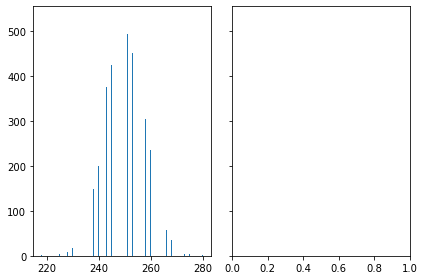

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import time
import itertools
import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt

from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# Online Python - IDE, Editor, Compiler, Interpreter
import random

res_values = [0 for i in range(400)]

arrdots = []

arrdotsSM = []

allrange = []

arrMembers = [0 for i in range(1000)]

arrVertex = [0 for i in range(1000)]

dataArr = [[0 for i in range(500)] for i in range(500)]

# работа с графами
def add_nodes(nodes, graph):  # Упрощаем добавление вершин
    for i in nodes:
        graph.add_node(i)

def add_edge(f_item, s_item, graph):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item)

# работа с матрицами
def range_dots(d, arrA, arrB):
    res = 0
    # for i in range(d):
    for i in range(2):
        res += (arrA[i] - arrB[i])**2 
    return res**0.5

def add_dot(d):
    dot = []
    # for i in range(d):
    for i in range(2):
        dot.append(random.random())
    arrdots.append(dot)

def addall(n, d):
    for i in range(n):
        add_dot(d)
        
def create_M(n):
    d = 2
    M = []
    addall(n, d)
    for i in range(n):
        res = []
        for j in range(n):
            #res.append(range_dots(d, arrdots[i], arrdots[j]))
            if i == j:
                res.append(0)
            else:
                if i < j:
                    res.append(random.random())
                else:
                    res.append(M[j][i])
            
            # allrange.append(range_dots(d, arrdots[i], arrdots[j]))
        M.append(res)    
    #for item in M:
    #    print(item)
    create_SM(M)
    
def create_SM(M):
    res = []
    for item in M:
        
        minval = 1
        for val in item:
            if val != 0:
                if val < minval:
                    minval = val
        
        new_res = []
        for j in item:
            if j == minval:
                new_res.append(1)
            else:
                new_res.append(0)
        res.append(new_res)
    ##for item in res:
    ##    print(item)
    ##print("+")
    create_COMPS(len(M), res)
    return res

def create_COMPS(n, M):
    res = []
    vals = [i for i in range(n)]
    
    # делаем графы
    graph = nx.Graph()
    # add_nodes(('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'), graph)
    # add_nodes((0, 1, 2, 3, 4, 5, 6, 7, 8), graph)
    add_nodes(tuple([i for i in range(n)]), graph)
    
    while len(vals) > 0:
        index_i = vals[0]  # получаем первый доступный
        arr_i = M[index_i] # получаем соответствующий столбец
        
        index_j = 0 # самый ближний индекс
        for k in range(n): # получаем самый ближний
            if arr_i[k] == 1:
                index_j = k
                
        # print(index_i, index_j)
        # add_edge(str(index_i), str(index_j), graph)
        add_edge(index_i, index_j, graph)
        # print("+++", index_i, index_j)
        # print(999, res)
        if len(res) == 0:
            res.append([index_i, index_j])
        else:
            flag = 0
            for i in range(len(res)):
                if index_i in res[i]:
                    res[i].append(index_j)
                    flag = 1
                elif index_j in res[i]:
                    res[i].append(index_i)
                    flag = 1
            if flag == 0:
                res.append([index_i, index_j])
        # print(99999, res)
        vals.pop(0)
    
    # считаем степени вершин в получившимся графе из нескольких компонент
    for i in range(n):
        arrVertex[graph.degree[i]] += 1
    
    # убираем списки с повторяющемися элементами
    real_res = [res[0]]
    for i in range(1, len(res)):
        flag_isin = 0
        for j in range(len(real_res)):
            for value in res[i]:
                if value in real_res[j]:
                    real_res[j] += res[i]
                    flag_isin = 1
                    break
        if flag_isin == 0:
            real_res.append(res[i])
    for i in range(len(real_res)):
        real_res[i] = list(set(real_res[i]))
        ## print("+++", real_res[i])
        arrMembers[len(real_res[i])] += 1
        dataArr[len(real_res[i])][len(real_res)] += 1
    #print(real_res) -- [[0, 8, 10], [1, 6], [2, 3, 4, 5, 7, 9]]
    ## print(777, res)
    # выводим получившийся результат
    #for resI in res:
    #    print(resI)
    
    # подсчёт компонент связанности через квадрат диагональных элементов
    ress = 0
    for k in range(n):
        for i in range(n):
            ress += M[k][i]*M[i][k]
    # print(int(ress/2))
    res_values[int(ress/2)] += 1
    allrange.append(int(ress/2))
    #print(len(res))

    
def itValue(NN, nn):
    for i in range(NN):
        create_M(nn)
        arrdots = []
        arrdotsSM = []

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(allrange, bins=int(nn/2))

NN = 10000
nn = 1000
    
arrMembersAll = []
arrVertexAll = []

t_end = time.time()
for i in range(NN):
    if i%int(NN/100) == 0:
      print(f"{i//int(NN/100)}% ", time.time()-t_end, "s")
    create_M(nn)
    arrdots = []
    arrdotsSM = []
#for i in range(5, 75):
#    nn = i
#    for j in range(NN):
#        create_M(nn)
#        arrdots = []
#        arrdotsSM = []
#    arrMembersAll.append(arrMembers)
#    arrVertexAll.append(arrVertex)
#    arrMembers = [0 for i in range(100)]
#    arrVertex = [0 for i in range(100)]
    
# print([res_values[i]/NN for i in range(len(res_values))])
print([res_values[i] for i in range(len(res_values))])
# allData = [[arrMembersAll[i][j] for j in range(30)] for i in range(30)]
# print(allData)
#for i in range(10):
#    print("arrMembers: ", arrMembersAll[i])
#    print("arrVertex: ", arrVertexAll[i])

# 0.0, 0.0,     5e-05,   0.00195, 0.0358,  0.19595, 0.37825, 0.29645, 0.084,   0.00745, 0.0001,  --- 2
# 0.0, 0.0,     0.00145, 0.0183,  0.1148,  0.3096,  0.3527,  0.1693,  0.0318,  0.00205, 0.0      --- 4
# 0.0, 0.0002,  0.00365, 0.0392,  0.18505, 0.34765, 0.2964,  0.1101,  0.0169,  0.0008,  5e-05    --- 6
# 0.0, 0.0,     0.0042,  0.0437,  0.1848,  0.34075, 0.29725, 0.1122,  0.0164,  0.0007,  0.0      --- 6
# 0.0, 0.00035, 0.0079,  0.06595, 0.231,   0.34755, 0.25375, 0.08355, 0.0096,  0.00035, 0.0      --- 8
# 0.0, 0.00045, 0.0122,  0.09225, 0.2719,  0.34875, 0.21035, 0.0575,  0.00645, 0.00015, 0.0      --- 10
# 0.0, 0.0009,  0.02165, 0.1276,  0.3186,  0.33425, 0.16185, 0.0325,  0.0026,  5e-05,   0.0      --- 10(19)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# print(allrange)
axs[0].hist(allrange, bins=int(nn/2))

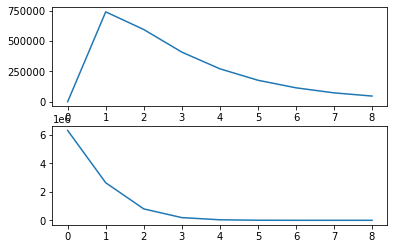

251.1755
1499.7508


In [47]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(arrMembers[1:10])
plt.subplot(212)
plt.plot(arrVertex[1:10])
plt.show()

val_mem = 0
for i in range(len(arrMembers)):
    # print((i), arrMembers[i]/NN)
    val_mem += arrMembers[i]
print(val_mem/NN)
val_vert = 0
for i in range(len(arrVertex)):
    val_vert += (i)*arrVertex[i]
print(val_vert/NN)

In [48]:
import numpy as np
import scipy.stats as stats

# Вычисление первого и второго моментов выборки
mean = np.mean(allrange)
var = np.var(allrange)

print(mean, var)

250.1246 61.80007484


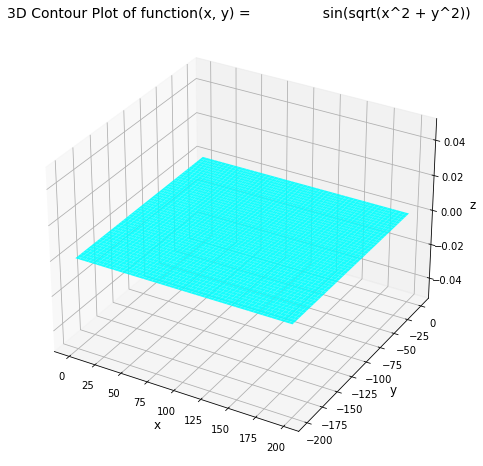

In [49]:

def function(x, y):
    #return np.array(allData)
    #return allData[x][y]
    #return np.sin(np.sqrt(x ** 2 + y ** 2))
    #print(x, y)
    
    val = dataArr[int(x)][int(y)]
    # val = allData[int(x)][int(y)]
    return np.sqrt(np.sqrt(val))
 
 
#x = [i/100 for i in range(-1000, 1000)] #np.linspace(-10, 10, 40)
#print(np.linspace(-10, 10, 40))
#y = [i/100 for i in range(-1000, 1000)] #np.linspace(-10, 10, 40)
 
x = [i for i in range(200)]
y = [i for i in range(200)]
    
X, Y = np.meshgrid(x, y)
myFn = np.vectorize(function, excluded=['x', 'y'])
Z = myFn(X, Y)
 
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
 
#ax.plot_surface(-X, -Z, Y, cmap='cool', alpha=0.9)
ax.plot_surface(Y, -X, Z, cmap='cool', alpha=0.9)

 
ax.set_title('3D Contour Plot of function(x, y) =\
                sin(sqrt(x^2 + y^2))', fontsize=14)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
 
plt.show()

[2, 2, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10] [232, 271, 233, 270, 234, 235, 266, 268, 236, 237, 265, 263, 264, 239, 240, 241, 261, 262, 242, 243, 244, 256, 257, 258, 259, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254]


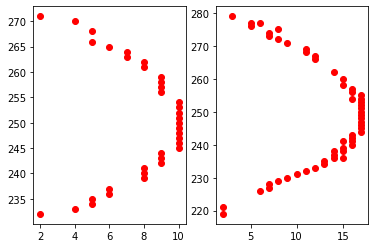

In [50]:
a = []
b = []
c = []
d = []
for i in range(len(dataArr)):
    for j in range(len(dataArr[0])):
        if (dataArr[i][j]**0.25 < 6.5) and (dataArr[i][j]**0.25 > 5.9):
            a.append(i)
            b.append(j)
        if (dataArr[i][j]**0.25 < 2.9) and (dataArr[i][j]**0.25 > 2.6):
            c.append(i)
            d.append(j)
        
print(a, b)
        
#plt.axis([0,30,0,30])
plt.title('My first plot')
plt.subplot(121)
plt.plot(a,b,'ro')
plt.subplot(122)
plt.plot(c,d,'ro')
plt.show()